In [28]:
import pandas as pd
import scipy.stats as stats

# # Load the dataset and create a DataFrame
df = pd.read_csv('insurance.csv')

# Assuming 'df' my your DataFrame
# Calculate the mean insurance expenses for smokers
mean_expenses_smokers = df[df['smoker'] == 'yes']['expenses'].mean()

# Calculate the mean insurance expenses for non-smokers
mean_expenses_non_smokers = df[df['smoker'] == 'no']['expenses'].mean()

print("Mean Expenses for Smokers:", mean_expenses_smokers)
print("Mean Expenses for Non-Smokers:", mean_expenses_non_smokers)


Mean Expenses for Smokers: 32050.23197080292
Mean Expenses for Non-Smokers: 8434.268449248118


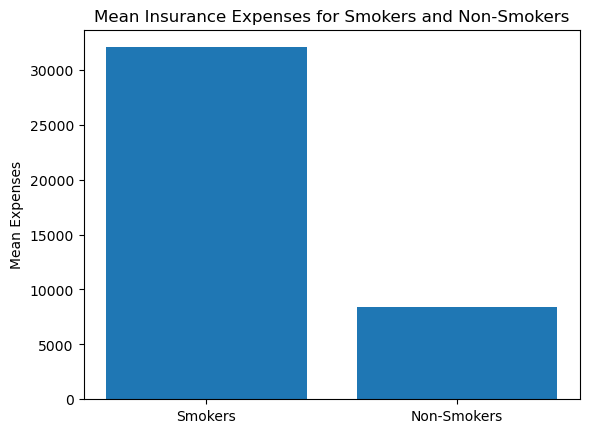

In [24]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Calculate the mean insurance expenses for smokers and non-smokers
mean_expenses_smokers = df[df['smoker'] == 'yes']['expenses'].mean()
mean_expenses_non_smokers = df[df['smoker'] == 'no']['expenses'].mean()

# Create a bar plot
plt.bar(['Smokers', 'Non-Smokers'], [mean_expenses_smokers, mean_expenses_non_smokers])
plt.ylabel('Mean Expenses')
plt.title('Mean Insurance Expenses for Smokers and Non-Smokers')
plt.show()


In [27]:
from scipy import stats

# Sample data
expenses_smokers = df[df['smoker'] == 'yes']['expenses']
expenses_non_smokers = df[df['smoker'] == 'no']['expenses']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(expenses_smokers, expenses_non_smokers)

if p_value < 0.05:
    print("Reject the null hypothesis: Smoking status significantly affects insurance expenses.")
else:
    print("Fail to reject the null hypothesis: Smoking status does not significantly affect insurance expenses.")


Reject the null hypothesis: Smoking status significantly affects insurance expenses.
